In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from PythonScripts import wrangle

from scipy import stats

import datetime

## Wrangle Data

In [2]:
df = wrangle.get_curriculum_log()

In [3]:
df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,
2018-01-26,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP
2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP
2018-01-26,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP


In [4]:
df.shape

(954312, 11)

In [5]:
df.isnull().sum()

endpoint        0
user_id         0
cohort_id       0
source_ip       0
name            0
start_date      0
end_date        0
created_at      0
updated_at      0
program_id      0
program_name    0
dtype: int64

In [6]:
df.sample(5)

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,
2020-03-02,/,585,55.0,97.105.19.58,Curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,3,Data Science
2020-08-23,html-css/forms,605,56.0,72.190.25.232,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2,Java
2021-04-05,sql/temporary-tables,900,137.0,67.11.226.248,Florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3,Data Science
2020-01-06,jquery/selectors,524,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,2,Java
2020-03-22,jquery/ajax/requests-and-responses,556,53.0,172.9.1.31,Fortuna,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,2,Java


In [7]:
florence_cohort = df[df['name'] == "Florence"]
florence_cohort.sample(5)

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,
2021-03-19,fundamentals/AI-ML-DL-timeline.jpg,913,137.0,68.77.133.109,Florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3,Data Science
2021-05-31,classification/explore,949,137.0,136.49.16.164,Florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3,Data Science
2021-04-06,python/data-types-and-variables,911,137.0,3.101.140.94,Florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3,Data Science
2021-04-28,storytelling/create,904,137.0,70.117.3.180,Florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3,Data Science
2021-06-03,regression/project,909,137.0,96.8.130.67,Florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3,Data Science


## Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [8]:
# take a look at the value counts for program name
df.program_name.value_counts()

Java            791196
Data Science    122001
PHP              41110
Front End            5
Name: program_name, dtype: int64

In [9]:
df.program_id.value_counts()

2    791196
3    122001
1     41110
4         5
Name: program_id, dtype: int64

In [10]:
# take a look at endpoint values per PHP
df[df.program_name=='PHP'].endpoint.value_counts().head(3)

/               1869
javascript-i    1144
index.html      1011
Name: endpoint, dtype: int64

In [11]:
# take a look at endpoint values per Java
df[df.program_name=='Java'].endpoint.value_counts().head(3)

/               38763
javascript-i    19280
toc             19221
Name: endpoint, dtype: int64

In [12]:
# take a look at endpoint values per Data Science
df[df.program_name=='Data Science'].endpoint.value_counts().head(3)

/                           9866
search/search_index.json    2950
classification/overview     2455
Name: endpoint, dtype: int64

In [13]:
# take a look at endpoint values per Front End
df[df.program_name=='Front End'].endpoint.value_counts().head(3)

content/html-css                               2
content/html-css/introduction.html             1
content/html-css/gitbook/images/favicon.ico    1
Name: endpoint, dtype: int64

### The programs are most attracted to lessons as follows:
- PHP (1) most visited: Java
- Java (2) most visited: Javascipt
- Data Science (3) most visited: Classification Overview
- Front End (4) most visited: HTML CSS

## Which lessons are least accessed?

In [14]:
# take a look at the value counts of each endpoint site
df.endpoint.value_counts()

/                                                        50499
javascript-i                                             20434
search/search_index.json                                 20220
toc                                                      19632
html-css                                                 14772
                                                         ...  
storytelling/bad-charts/misleading1_baseball.jpg             1
fundamentals/repositories                                    1
javascript-i/bom-and-dom/bom/http%22://www.google.com        1
css-ii/grids                                                 1
html/forms                                                   1
Name: endpoint, Length: 2315, dtype: int64

In [15]:
# look at the bottom of the list of visited endpoints

# looking at the bottom five sites for more than 2 visits
(df.endpoint.value_counts(ascending=True)>2).index.tolist()[:5]

['html/forms',
 'css-ii/grids',
 'javascript-i/bom-and-dom/bom/http%22://www.google.com',
 'fundamentals/repositories',
 'storytelling/bad-charts/misleading1_baseball.jpg']

- But what is our sweet spot? Is it 3 visits? Is it 10 visits?
- Using an outlier function to pinpoint will be the best method to reduce the noise and see which number represents legitimate visits and what is considered low.

In [16]:
# make it into a dataframe for coding purposes
endpoints = pd.DataFrame(df.endpoint.value_counts())
endpoints

,endpoint
/,50499
javascript-i,20434
search/search_index.json,20220
toc,19632
html-css,14772
...,...
storytelling/bad-charts/misleading1_baseball.jpg,1
fundamentals/repositories,1
javascript-i/bom-and-dom/bom/http%22://www.google.com,1
css-ii/grids,1


In [17]:
def get_lower_and_upper_bounds(df, k=1.5):
    '''
    calculates the lower and upper bound to locate outliers and displays them
    note: recommended k be 1.5
    '''
    for i in df.columns:
        if df[i].dtypes != 'object':
            quartile1, quartile3 = np.percentile(df[i], [25,75])
            IQR_value = quartile3 - quartile1
            lower_bound = (quartile1 - (k * IQR_value))
            upper_bound = (quartile3 + (k * IQR_value))
            print('------------------------------------------------------')
            print(f'For {i} the lower bound is {lower_bound} and  upper bound is {upper_bound}')
            outliers_lower = df[df[i] < lower_bound]
            outliers_upper = df[df[i] > upper_bound]
            outliers = pd.concat([outliers_lower, outliers_upper], axis=0)
            print('')
            print(outliers,'\n')
    else:
        print('')

In [18]:
# use function to see what the bounds are for sites visited
get_lower_and_upper_bounds(endpoints, k=1.5)

------------------------------------------------------
For endpoint the lower bound is -127.0 and  upper bound is 217.0

                                                    endpoint
/                                                      50499
javascript-i                                           20434
search/search_index.json                               20220
toc                                                    19632
html-css                                               14772
...                                                      ...
2-storytelling/2.2-create                                219
3.0-mysql-overview                                       219
10-anomaly-detection/3-discrete-probabilistic-m...       219
sql/clauses-overview                                     219
individual-project/individual-project                    218

[439 rows x 1 columns] 




- This function tells us 217 or more visits are legitimate visits.
- Anything below 217 is likely noise, accidental clicks etc..
- We can isolate the bottom part of the list for more than 217 visits.

In [19]:
# pull the bottom visited sites filtering by more than 217 visits
df.endpoint.value_counts().reset_index(name='count').query('count > 217')['index'].tolist()[-6:]

['appendix/professional-development/job-search-workshop',
 '2-storytelling/2.2-create',
 '3.0-mysql-overview',
 '10-anomaly-detection/3-discrete-probabilistic-methods',
 'sql/clauses-overview',
 'individual-project/individual-project']

### Takeaways:
- Most of the lower visited sites are all data science sites.
- This makes sense because there are less data science students and it is a newer program.

## Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [20]:
df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,
2018-01-26,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP
2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP
2018-01-26,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP


In [21]:
# take a look at the shape of the original dataframe
df.shape

(954312, 11)

In [22]:
# isolate the rows that were created during the student's active time
curr_df = df[df.start_date>=df.index]
curr_df = curr_df[curr_df.index<=curr_df.end_date]

curr_df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,
2018-03-05,html-css/css-i,25,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2,Java
2018-03-05,html-css/forms,25,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2,Java
2018-03-05,html-css/css-i,25,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2,Java
2018-03-05,html-css/css-i/introduction,25,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2,Java
2018-03-05,html-css,25,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2,Java


In [23]:
# group by user_id and get a count of total endpoints per user
user_df = pd.DataFrame(curr_df.groupby('user_id')['endpoint'].count())

user_df.head()

,endpoint
user_id,
25,15
116,10
117,6
118,7
119,6


In [24]:
# evaluate endpoint counts
user_df[user_df.endpoint>1]

,endpoint
user_id,
25,15
116,10
117,6
118,7
119,6
...,...
974,8
976,4
977,10


- But again what is the sweet spot? Is there excess noise in the dataframe?
- There are a lot of users with only 1 endpoint, this seems like it may be an anomaly

In [25]:
# take a look at the statistics of my dataframe
user_df.describe()

,endpoint
count,431.000000
mean,6.524362
std,6.627198
min,1.000000
25%,2.000000
50%,4.000000
75%,9.000000
max,52.000000


- The mean average of endpoints is 6.5 which is on the lower side.
- All of the end points equaling 1 are likely skewing the data a bit.
- It is hard to see what a normal amount of visits is

In [26]:
# take a look at median of endpoint count to see the lower end of average
user_df.median()

endpoint    4.0
dtype: float64

In [27]:
user_df.endpoint.sort_values()

user_id
712     1
557     1
902     1
903     1
565     1
       ..
133    29
581    32
344    36
582    50
433    52
Name: endpoint, Length: 431, dtype: int64

In [28]:
get_lower_and_upper_bounds(user_df, k=1.5)

------------------------------------------------------
For endpoint the lower bound is -8.5 and  upper bound is 19.5

         endpoint
user_id          
133            29
187            21
218            20
234            21
302            21
325            21
333            23
344            36
433            52
490            22
555            22
570            28
581            32
582            50
681            25
691            20
760            25
823            27
901            26
909            25
979            23 




In [29]:
# get list of users that have endpoints from 20 to 22 since this is considered the lower end of average
user_list = user_df[(user_df.endpoint>=20) & (user_df.endpoint<=22)].index.to_list()
user_list

[187, 218, 234, 302, 325, 490, 555, 691]

In [30]:
# pd.Series((np.abs(stats.zscore(user_df['endpoint']))>2))

In [31]:
# z_scores = pd.Series((user_df['endpoint'] - user_df['endpoint'].mean()) / user_df['endpoint'].std())

# user_df['endpoint_zs'] = z_scores

In [32]:
# pulls out users who's endpoint count falls 2 standard deviations from the mean
# user_df[user_df.endpoint_zs.abs()<.5].sort_values(by='endpoint').head(10)

In [33]:
# take a quick snap shop of one of the users from the list
curr_df[curr_df.user_id==187]

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,
2018-05-29,/,187,24.0,97.105.19.61,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/01-intro,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/02-listing-files,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/03-file-paths,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/01-intro,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/02-listing-files,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java


In [34]:
#create a for loop to get the whole information about the least accessed endpoint
user_df= pd.DataFrame()
for i in user_list:
    x =curr_df[curr_df['user_id'] == i]
    user_df= pd.concat([user_df, x], ignore_index = False)

In [35]:
# take a look at our dataframe of users with the low end of average endpoints
user_df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,
2018-05-29,/,187,24.0,97.105.19.61,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/01-intro,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/02-listing-files,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java


In [36]:
# explore df
user_df.program_name.value_counts()

Java            148
Data Science     20
Name: program_name, dtype: int64

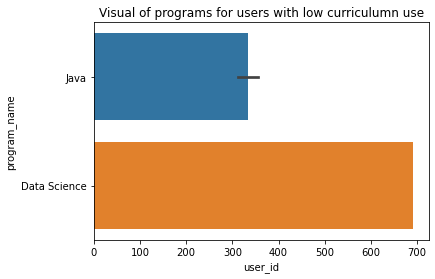

In [37]:
# visualize the programs amongst these users
sns.barplot(x='user_id', y='program_name', data=user_df)
plt.title('Visual of programs for users with low curriculumn use');

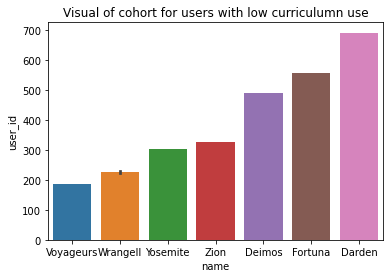

In [38]:
# visualize the programs amongst these users
sns.barplot(y='user_id', x='name', data=user_df)
plt.title('Visual of cohort for users with low curriculumn use');

In [39]:
user_df.endpoint.value_counts()

html-css                                                                     18
html-css/introduction                                                        14
/                                                                            14
html-css/elements                                                            13
toc                                                                           7
java-i                                                                        6
prework/cli                                                                   5
html-css/forms                                                                5
appendix                                                                      4
1-fundamentals/modern-data-scientist.jpg                                      4
1-fundamentals/AI-ML-DL-timeline.jpg                                          4
prework/cli/02-listing-files                                                  3
1-fundamentals/1.1-intro-to-data-science

In [40]:
# a couple of users appear to have multiple ip addresses so that is worth looking into
user_df.groupby('user_id')['source_ip'].value_counts()

user_id  source_ip    
187      45.31.213.223    20
         97.105.19.61      1
218      97.105.19.58     20
234      97.105.19.58     21
302      97.105.19.58     21
325      97.105.19.58     21
490      70.121.205.5     17
         97.105.19.58      5
555      136.50.32.151    20
         97.105.19.58      2
691      66.69.83.140     20
Name: source_ip, dtype: int64

In [41]:
user_df.source_ip.value_counts()

97.105.19.58     90
136.50.32.151    20
45.31.213.223    20
66.69.83.140     20
70.121.205.5     17
97.105.19.61      1
Name: source_ip, dtype: int64

### Takeaways:
- There is not any major takeaways as far as cohort.
- The users are majority made up of data science and java students.
- Despite a lot of the students being data science, the majority of the websites visits are not related to data science at all.